In [56]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np 
import psutil
import os

In [57]:
N = int(1e5)
Ndim = 8

data_lst = []
for i in range(6):

    mean = (10*i + 1)*np.random.rand(Ndim)
    cov = (i + 1)*np.random.rand(Ndim,Ndim)

    cov = cov@cov.T
    
    data_lst.append(np.random.multivariate_normal(mean=mean, cov=cov, size=(N)))

    # print(mean, cov)

data = np.vstack([x for x in data_lst])


# Get the process ID
process_id = os.getpid()

# Get the process object
process = psutil.Process(process_id)

# Get the number of CPU cores used by the process
cpu_cores = psutil.cpu_count(logical=False)  # logical=False gives you physical cores

print(f"The process is using {cpu_cores} core(s).")

# print(gm.means_, gm.covariances_)

# print(gm.converged_, gm.n_iter_)

# Fit GMMs with different numbers of components

cmp = 1
gmm = GaussianMixture(n_components=cmp, covariance_type='full')
gmm.fit(data)
bic_val = gmm.bic(data)
bic_val_prev = bic_val
print(cmp, bic_val)
while True:

    cmp += 1
    bic_val_prev = bic_val
    gmm = GaussianMixture(n_components=cmp, covariance_type='full')
    gmm.fit(data)
    bic_val = gmm.bic(data)
    print(cmp, bic_val, bic_val_prev)

    if 1.01*bic_val > bic_val_prev:
        break

print(cmp - 1)
gmm = GaussianMixture(n_components=cmp, covariance_type='full')
gmm.fit(data)


The process is using 10 core(s).
1 31044541.968543198
2 28310772.000737965 31044541.968543198
3 27199838.427320298 28310772.000737965
4 25330591.64388876 27199838.427320298
5 25331704.952292405 25330591.64388876
4


GaussianMixture(n_components=5)

In [58]:
print(1.01*3847914.9488369618, 3297069.9745920245)

3886394.098325331 3297069.9745920245


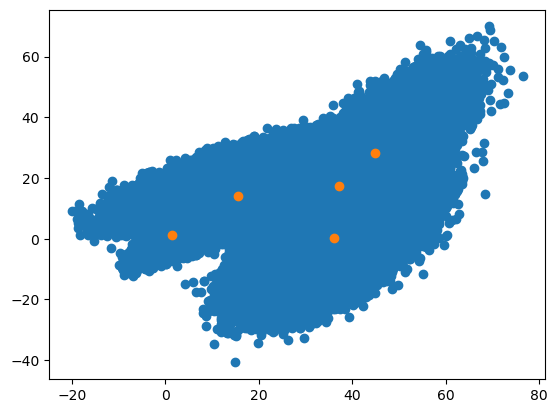

In [59]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(gmm.means_[:,0], gmm.means_[:,1])